In [14]:
import unittest
from Model.BandaiDataset import BandaiDataset
from Model.BandaiDataset import Motion
from Model.mymodel import ConvNet
import numpy as np
import torch


In [15]:
TEST_VEDIO_DIR = 'test/testfolder/'
TEST_FILE_NAME1 = 'dataset-1_walk_not-confident_001'
TEST_FILE_NAME2 = 'dataset-1_walk_sad_002'
TEST_SET_FRAME = 10
TEST_JSON_DIR = './datasets/data/'


In [16]:
class TestMotion(unittest.TestCase):
    def setUp(self):
        self.motion = Motion()

    def test_input_motion(self):
        print("Testing Motion.input_motion(): ", end='')
        self.setUp()
        self.motion.input_motion(TEST_VEDIO_DIR, TEST_FILE_NAME1,TEST_JSON_DIR)
        cnt = 0
        pose_size = np.array(self.motion.pose_list).shape
        flag = True
        for i in self.motion.pose_list:
            tmp = np.array(self.motion.pose_list).shape
            cnt += 1 
            if(tmp != pose_size):
                flag = False
        motion_lenth = cnt

        self.assertEqual((flag,motion_lenth),(True,self.motion.frame_num))
        print("ok!")

    def test_adjust(self):
        print("Testing Motion.adjust(): ", end='')
        self.setUp()
        self.motion.input_motion(TEST_VEDIO_DIR, TEST_FILE_NAME1,TEST_JSON_DIR)
        self.motion.adjust(TEST_SET_FRAME)
        self.assertEqual(self.motion.frame_num, TEST_SET_FRAME)
        print("ok!")

    def test_get_motion_tensor(self):
        print("Testing Motion.get_motion_tensor(): ", end='')
        self.setUp()
        self.motion.input_motion(TEST_VEDIO_DIR, TEST_FILE_NAME1,TEST_JSON_DIR)
        motion_tensor = self.motion.get_motion_tensor(TEST_SET_FRAME)
        size_of_motion = motion_tensor.shape
        self.assertEqual(size_of_motion,torch.Size([TEST_SET_FRAME,480,640]))
        print("ok!")
        
    def test_get_pose(self):
        print("Testing Motion.get_pose(): ", end='')
        self.setUp()
        self.motion.input_motion(TEST_VEDIO_DIR, TEST_FILE_NAME1,TEST_JSON_DIR)
        pose = self.motion.get_pose(0)
        self.assertEqual(pose.shape,torch.Size([480,640]))
        print("ok!")
        self.motion.draw_pose(0)

In [17]:
class TestBandaiDataset(unittest.TestCase):
    def setUp(self):
        self.dataset = BandaiDataset()
        self.listfile = 'test/filenames.txt'
        
    def test_get_filenames(self):
        print("Testing BandaiDataset.get_pose(): ", end='')
        self.setUp()
        self.dataset.VIDEO_DIR = 'test/testfolder/'
        self.dataset.get_filenames(self.listfile)
        self.assertEqual(self.dataset.filelist, ["dataset-1_walk_not-confident_001","dataset-1_walk_sad_002"])
        print("ok!")

    def test_load(self):
        print("Testing Motion.load(): ", end='')
        self.setUp()
        self.dataset.load(self.listfile)
        self.assertEqual(self.dataset.filelist,[TEST_FILE_NAME1,TEST_FILE_NAME2])
        print("ok!")
        

In [18]:
class TestConvnet(unittest.TestCase):
    def setUp(self) -> None:
        self.net = ConvNet()
    
    def checkmodel(self):
        pass

In [19]:
test = TestBandaiDataset()
test.test_get_filenames()
test.test_load()

Testing BandaiDataset.get_pose(): ok!
Testing Motion.load(): ok!


Testing Motion.input_motion(): ok!
Testing Motion.adjust(): ok!
Testing Motion.get_motion_tensor(): ok!
Testing Motion.get_pose(): ok!


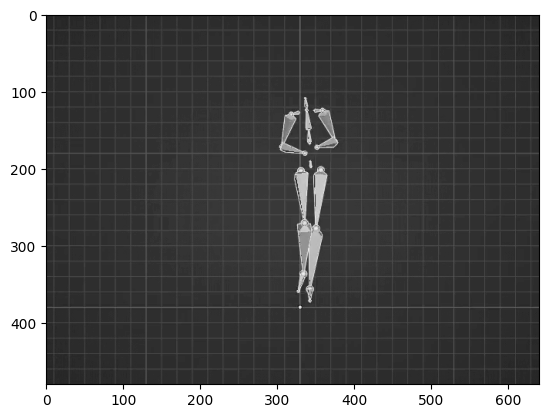

In [20]:
test = TestMotion()
test.test_input_motion()
test.test_adjust()
test.test_get_motion_tensor()
test.test_get_pose()
